<a href="https://colab.research.google.com/github/VinolFernandes/SaveSoilSentiment/blob/main/SaveSoil10000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tweet-preprocessor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing necessary librares:**

In [4]:
import re
import seaborn as sns
# from textblob import TextBlob
import tweepy,json
import configparser
import pandas as pd
# import nltk
import preprocessor as p
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud

# **Twitter authentication:**

In [31]:
# read configs
# config = configparser.ConfigParser()
# config.read('config.ini')

api_key = "REPLACE_ME"
api_key_secret ="REPLACE_ME"

access_token = "REPLACE_ME"
access_token_secret = "REPLACE_ME"

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# **Extracting Data, based on keywords:**

In [34]:

# user tweets
# user = 'veritasium'
# limit=300

# tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

# search tweets
keywords = '#savesoil'
limit=10000

tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended' ).items(limit)
print(tweets)
# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')

# create DataFrame
columns = ['User', 'Tweet','Source','Verified','Location','Language']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text,tweet.source,tweet.user.verified,tweet.user.location,tweet.lang])
    # print(data[:2])
    


df = pd.DataFrame(data, columns=columns)

print(df)
df1=df["Tweet"]

                 User                                              Tweet  \
0         mashish1987  It's going to be a great event. Let's us be a ...   
1           green4EMA  RT @DebbieatEMA: He did it for the bees. 🐝🐝\n\...   
2      chaitu41386584  RT @cpsavesoil: Beloved Bharat gives @Sadhguru...   
3     rajwind13817958  #savesoil let’s make it happen 🙏🏻👍🏻 https://t....   
4        Imrankiyani5  Somewhere At the centre of earth in the past m...   
...               ...                                                ...   
9995     akram_inflow  Sadhguru is back!\n#SaveSoil #ConsciousPlanet ...   
9996  MounikaBommathi  Thank @ChaudhryShankar  Garu🙏 for the interest...   
9997     Aakash020719  RT @sumanips: Welcome Back #Sadhguru \nYou pat...   
9998   kvenkata832806          RT @AlexisZwerner: #SaveSoil    🙏 😍 🙇🏻‍♂️   
9999        soilsave8  RT @cpsavesoil: After 70 days on the road trav...   

                   Source  Verified             Location Language  
0     Twitter for A

# **Cleaning data:**

In [35]:
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text

def stopword_removal(row):
    text = row['Tweet']
    text = remove_stopwords(text)
    return text

df['Tweet']=df.apply(preprocess_tweet,axis=1)
# print(df)   
df['Tweet'] = df.apply(stopword_removal, axis=1)


df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
# print(df)

tweet_string_list = df['Tweet'].tolist()
tweet_string = ' '.join(tweet_string_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


# **Plotting Wordcloud:**

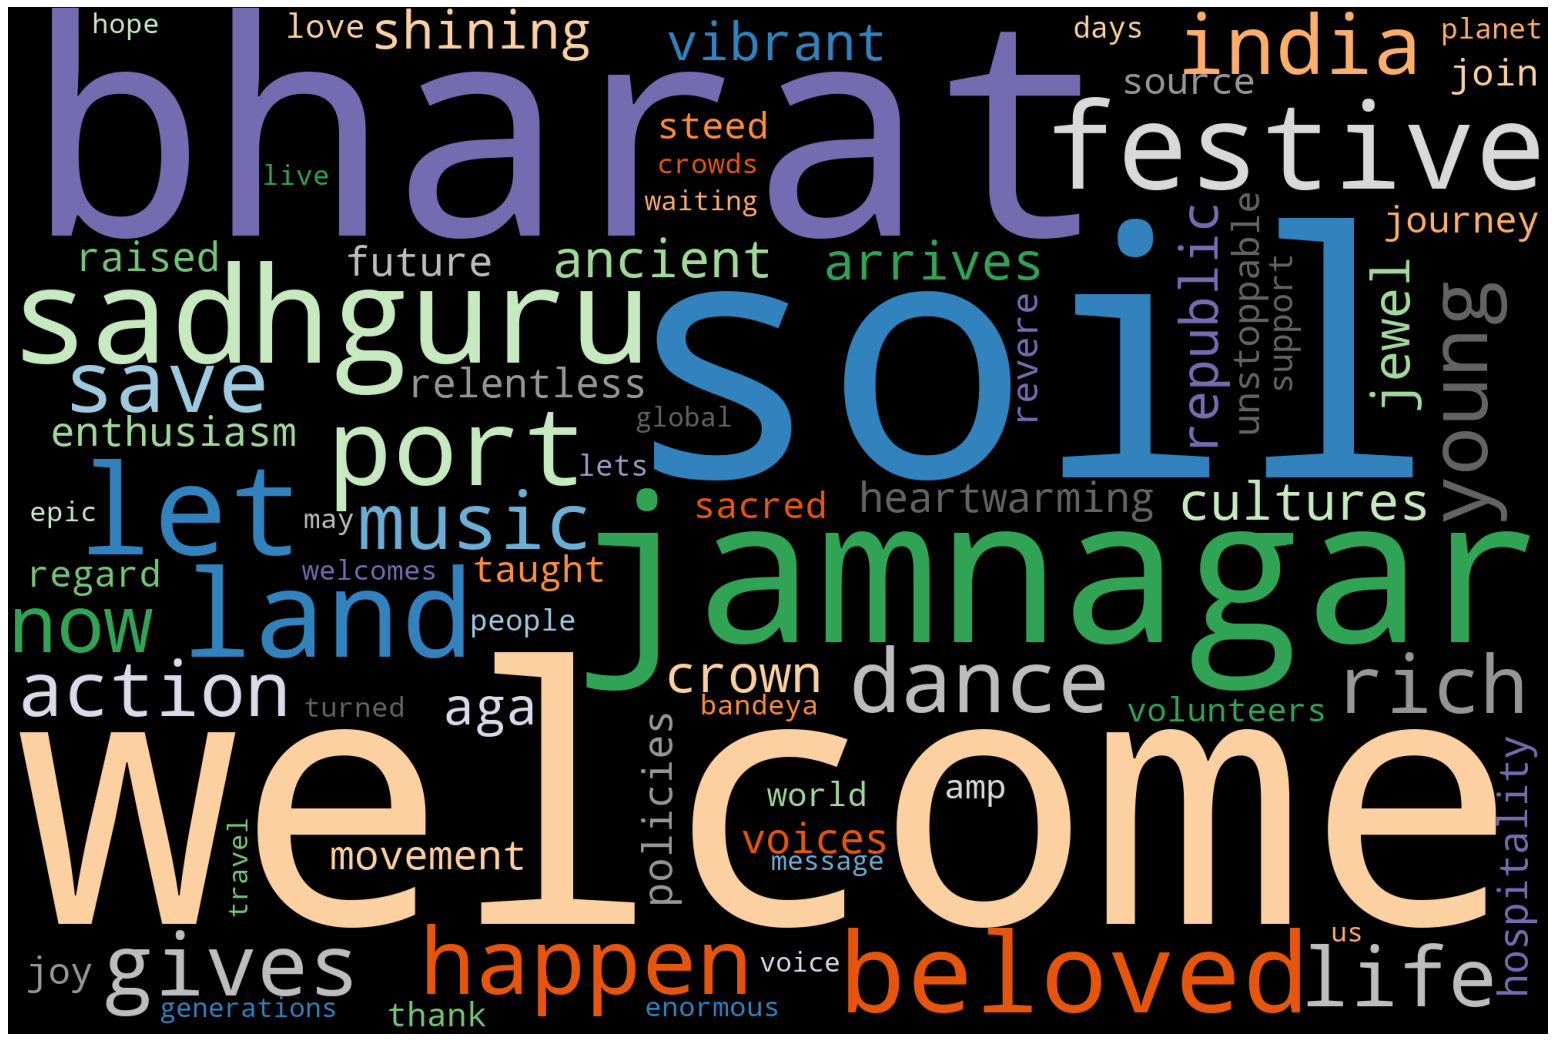

Index(['User', 'Tweet', 'Source', 'Verified', 'Location', 'Language'], dtype='object')

In [36]:
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='tab20c', max_words = 75, collocations=False, normalize_plurals=False).generate(tweet_string)

# df.info()

import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 

plot_cloud(wordcloud)

df1.to_csv('tweet.csv', sep = ';', line_terminator = '', encoding = 'utf-8')
df.columns

# **Classifying Tweets Based on Region**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128038 missing from current font.
  font.se

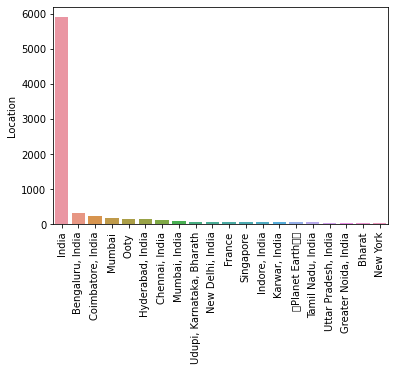

In [37]:

sns.barplot(x=df.Location.value_counts()[1:21].index,y=df.Location.value_counts()[:20])
plt.xticks(rotation=90)


# **Source of Tweets:**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

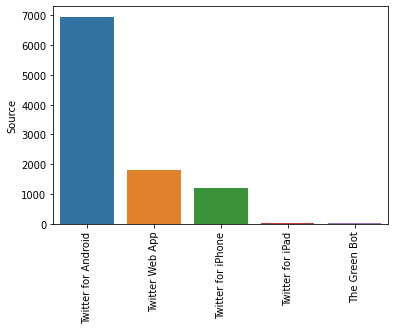

In [38]:
df.Source.value_counts()

sns.barplot(x=df.Source.value_counts()[:5].index,y=df.Source.value_counts()[:5])
plt.xticks(rotation=90)


# **Verified v/s Normal Tweets:**

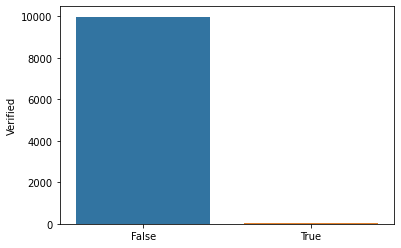

In [39]:
df.Verified.value_counts()
sns.barplot(x=df.Verified.value_counts()[:5].index,y=df.Verified.value_counts()[:5])


# **Classifying tweets based on languages:**

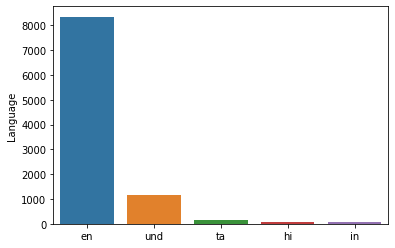

In [40]:
df.Language.value_counts()
sns.barplot(x=df.Language.value_counts()[:5].index,y=df.Language.value_counts()[:5])